Author  : Shraddha Anbhule

Mail    : sanbhule028@gmail.com

Project : Prediction of the Next Word

Dataset : https://www.kaggle.com/datasets/next-word-prediction

# Importing the Dependencies

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from keras.utils.vis_utils import plot_model

In [3]:
file = open(r"D:\Datasets\Next-Word-Data.txt","r",encoding = "utf8")

In [4]:
lines = []
for i in file:
    lines.append(i)
data = ""
for i in lines:
    data = ' '. join(lines)
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('“', '').replace("”", '')
data = data.split()
data = ' '.join(data)
data[:200]

"Project Gutenberg's The Adventures of Sherlock Holmes, by Arthur Conan Doyle This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever. You may copy it, give i"

In [5]:
print('corpus length:', len(data))

corpus length: 573660


# Pre-processing

In [6]:
def create_model(vocabulary_size, seq_len):
    model = Sequential()
    model.add(Embedding(vocabulary_size, 25, input_length=seq_len))
    model.add(LSTM(150, return_sequences=True))
    model.add(LSTM(150))
    model.add(Dense(150, activation='relu'))
    model.add(Dense(vocabulary_size, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model

In [7]:
tokenizer =Tokenizer()
tokenizer.fit_on_texts([data])
pickle.dump(tokenizer, open('tokenizer1.pkl', 'wb'))
sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:10]

[142, 4680, 1, 986, 5, 125, 33, 46, 556, 2164]

In [8]:
len(sequence_data)

108958

In [9]:
vocab_size = len(tokenizer.word_index) + 1
vocab_size

8624

In [10]:
sequences = []
for i in range(3, len(sequence_data)):
    words = sequence_data[i-3:i+1]
    sequences.append(words)    
print("The length of sequences :", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The length of sequences : 108955


array([[ 142, 4680,    1,  986],
       [4680,    1,  986,    5],
       [   1,  986,    5,  125],
       [ 986,    5,  125,   33],
       [   5,  125,   33,   46],
       [ 125,   33,   46,  556],
       [  33,   46,  556, 2164],
       [  46,  556, 2164, 2165],
       [ 556, 2164, 2165,   27],
       [2164, 2165,   27,  987]])

# Traing & Testing

In [12]:
X = []
y = []
for i in sequences:
    X.append(i[0:3])
    y.append(i[3])
X = np.array(X)
y = np.array(y)

In [13]:
print("Data :\n", X[:10])
print()
print("Response :\n", y[:10])

Data :
 [[ 142 4680    1]
 [4680    1  986]
 [   1  986    5]
 [ 986    5  125]
 [   5  125   33]
 [ 125   33   46]
 [  33   46  556]
 [  46  556 2164]
 [ 556 2164 2165]
 [2164 2165   27]]

Response :
 [ 986    5  125   33   46  556 2164 2165   27  987]


In [14]:
y = to_categorical(y, num_classes=vocab_size)
y[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# LSTM (Long Short-Trem Memory)

In [16]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=3))
model.add(LSTM(150, return_sequences=True))
model.add(LSTM(150))
model.add(Dense(150, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))

In [17]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3, 10)             86240     
                                                                 
 lstm (LSTM)                 (None, 3, 150)            96600     
                                                                 
 lstm_1 (LSTM)               (None, 150)               180600    
                                                                 
 dense (Dense)               (None, 150)               22650     
                                                                 
 dense_1 (Dense)             (None, 8624)              1302224   
                                                                 
Total params: 1,688,314
Trainable params: 1,688,314
Non-trainable params: 0
_________________________________________________________________


# Fit Modeling

In [18]:
checkpoint = ModelCheckpoint("nextword1.h5", monitor='loss', verbose=1, save_best_only=True)
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.01))
lstm = model.fit(X, y, validation_split=.20, epochs=15, batch_size=512, shuffle=True, callbacks=[checkpoint]).history

Epoch 1/15
171/171 [==============================] - ETA: 0s - loss: 6.6958
Epoch 1: loss improved from inf to 6.69576, saving model to nextword1.h5
171/171 [==============================] - 54s 235ms/step - loss: 6.6958 - val_loss: 6.5667
Epoch 2/15
171/171 [==============================] - ETA: 0s - loss: 6.0711
Epoch 2: loss improved from 6.69576 to 6.07106, saving model to nextword1.h5
171/171 [==============================] - 37s 215ms/step - loss: 6.0711 - val_loss: 6.2591
Epoch 3/15
171/171 [==============================] - ETA: 0s - loss: 5.6182
Epoch 3: loss improved from 6.07106 to 5.61823, saving model to nextword1.h5
171/171 [==============================] - 37s 218ms/step - loss: 5.6182 - val_loss: 6.2010
Epoch 4/15
171/171 [==============================] - ETA: 0s - loss: 5.3150
Epoch 4: loss improved from 5.61823 to 5.31501, saving model to nextword1.h5
171/171 [==============================] - 35s 205ms/step - loss: 5.3150 - val_loss: 6.2249
Epoch 5/15
171/171 [

# Visualization

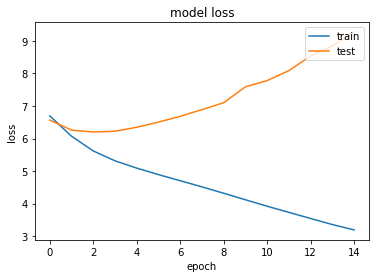

In [19]:
plt.plot(lstm['loss'])
plt.plot(lstm['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

# Result

In [20]:
model = load_model("nextword1.h5")
tokenizer = pickle.load(open("tokenizer1.pkl", 'rb'))

In [21]:
def predict_next_words(model, tokenizer, text) :    
    sequence = tokenizer.texts_to_sequences([text])
    sequence = np.array(sequence)
    preds = np.argmax(model.predict(sequence))
    predicted_word = ""
    for key, value in tokenizer.word_index.items() :
        if value == preds :
            predicted_word = key
            break
    return predicted_word

In [22]:
l = ["The Adventures of", "by Arthur Conan", "it is all", "0"]
for i in l :
    text = i
    if text == "0" :
        print()
        print("Execution completed...")
        break
    else :
        try :
            text = text.split(" ")
            text = text[-3:]
            print("Input :", i)
            print("Output : ", i, predict_next_words(model, tokenizer, text))
            print()
        except Exception as e :
            print("Error occured : ", e)
            continue

Input : The Adventures of
1/1 [==============================] - 1s 1s/step
Output :  The Adventures of the

Input : by Arthur Conan
1/1 [==============================] - 0s 24ms/step
Output :  by Arthur Conan doyle

Input : it is all
1/1 [==============================] - 0s 17ms/step
Output :  it is all the


Execution completed...
